### Rate analysis MuTe

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.mplot3d import Axes3D
import scipy
from scipy import stats

from IPython.display import Image
# This ensures visualizations are plotted inside the notebook
%matplotlib inline

### Number of events depending on the threshold

The test for the Vth0 spanning from 250 to 550 with a step of 50 was carried out . The muon rate at 900 m a.s.l. ($\approx 1.9 \mu/min.cm^2$), that means the expected rate for a MuTe panel (14400 $cm^2$) area is about 456 $\mu/s$.

### Particle rate depending on the altitude

The data were taked from: Report No. 094 - Exposure of the Population in the United States and Canada from Natural Background Radiation

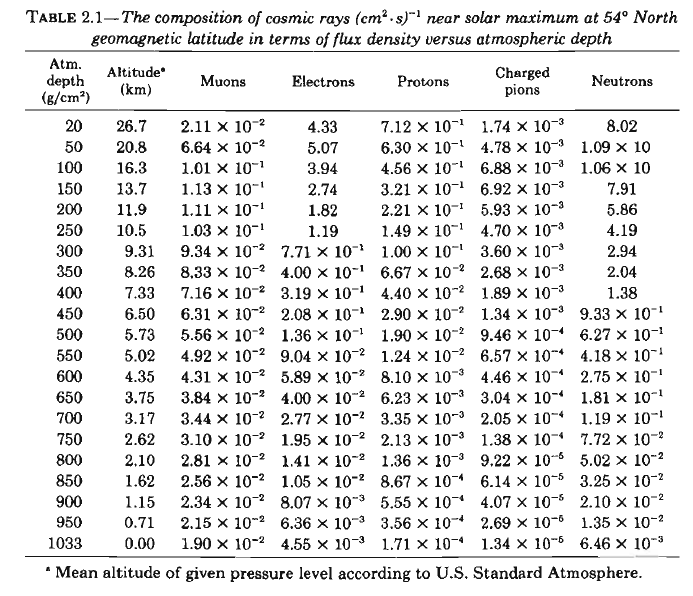

In [2]:
Image(filename='Figures/Particles_rate.png', width=500)

In [3]:
Alt = np.array([26.7, 20.8, 16.3,13.7,11.9,10.5,9.31,8.26,7.33,6.50,5.73,5.02,4.35,3.75,3.17,2.62,2.10,1.62,1.15,0.71,0])
Muon = np.array([2.11e-2,6.64e-2,1.01e-1,1.13e-1,1.11e-1,1.03e-1,9.34e-2,8.33e-2,7.16e-2,6.31e-2,5.56e-2,4.92e-2,4.31e-2,3.84e-2,3.44e-2,3.10e-2,2.81e-2,2.56e-2,2.34e-2,2.15e-2,1.9e-2])

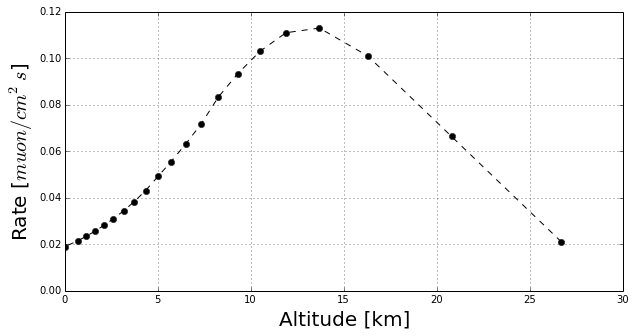

In [4]:
fig = plt.figure(figsize=(10, 5))
plt.plot(Alt, Muon, '--k', marker= "o")
plt.xlabel("Altitude [km]", fontsize = 20)
plt.ylabel("Rate [$muon/cm^2s$]", fontsize = 20)
plt.grid()
plt.show()

### Model fitting

In [5]:
# Gaussian parameters
def gaussian(x, a, u, s):
    return a * np.exp(-(x-u)**2 / s)

u = 15
s = 5
a = 0.12

init_vals = [a, u, s] # for [amp, mean, std]

param = scipy.optimize.curve_fit(gaussian,  Alt,  Muon,  p0=init_vals)
a_fit = param[0][0]
u_fit = param[0][1]
s_fit = param[0][2]

Altitude = np.linspace(0,28,101)
Muon_rate = a_fit * np.exp(-(Altitude-u_fit)**2 / s_fit)

Alt_MuTe = 0.99
area = 120**2
tasa =  a_fit * np.exp(-(Alt_MuTe-u_fit)**2 / s_fit)

print "Tasa de muones a 990 m.s.n.m = " + str(tasa) + " muon/cm2.s"
print "Tasa detectada = " + str(tasa*area) + " muon/s"

Tasa de muones a 990 m.s.n.m = 0.020675335345166215 muon/cm2.s
Tasa detectada = 297.7248289703935 muon/s


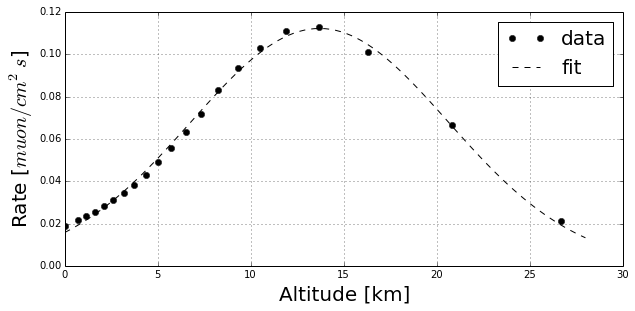

In [6]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.plot(Alt, Muon, 'ok')
plt.plot(Altitude, Muon_rate, '--k')
plt.xlabel("Altitude [km]", fontsize = 20)
plt.ylabel("Rate [$muon/cm^2s$]", fontsize = 20)
plt.legend(["data","fit"], loc = 0 , fontsize=20)
plt.grid()

### Sigle-dual panel rate calculation

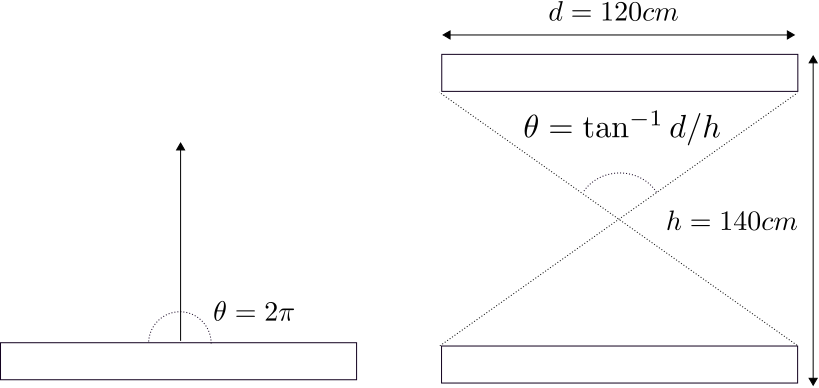

In [7]:
Image(filename='Figures/Apertura.png', width=500)

In [8]:
d = 120.0
h = 140.0
rad = np.arctan(d/h)
theta = 2*rad*180/np.pi

tasa_dual = theta*tasa*area/180.0

print "Tasa detectada en coincidencia = " + str(tasa_dual) + " muon/s"

Tasa detectada en coincidencia = 134.311261157339 muon/s


In [9]:
mean_P1 = []
std_P1 = []
Vth0_P1 = []
for i in range(250,600,50):

    rate = np.loadtxt('Rate_Vth/Rate_P1_Vth_' + str(i) + '.dat')
    mean_P1.append(np.mean(rate))
    std_P1.append(np.std(rate))
    Vth0_P1.append(i)
    print ('Vth0 = ' + str(i) + ' mean = ' + str (np.mean(rate)) + ' std = ' + str(np.std(rate)))

Vth0 = 250 mean = 1.306930693069307 std = 1.2800261001162154
Vth0 = 300 mean = 18.257425742574256 std = 4.377379896620502
Vth0 = 350 mean = 44.722772277227726 std = 6.271290567641234
Vth0 = 400 mean = 82.4059405940594 std = 7.776810180950179
Vth0 = 450 mean = 132.33663366336634 std = 13.07274182284602
Vth0 = 500 mean = 222.009900990099 std = 13.157458487549302
Vth0 = 550 mean = 758.0792079207921 std = 156.6970769482478


In [10]:
mean_P2 = []
std_P2 = []
Vth0_P2 = []
for i in range(250,600,50):

    rate = np.loadtxt('Rate_Vth/Rate_P2_Vth_' + str(i) + '.dat')
    mean_P2.append(np.mean(rate))
    std_P2.append(np.std(rate))
    Vth0_P2.append(i)
    print ('Vth0 = ' + str(i) + ' mean = ' + str (np.mean(rate)) + ' std = ' + str(np.std(rate)))

Vth0 = 250 mean = 0.7425742574257426 std = 0.9190337731383994
Vth0 = 300 mean = 15.297029702970297 std = 4.028474281750064
Vth0 = 350 mean = 39.68316831683168 std = 6.2551850857363105
Vth0 = 400 mean = 74.39603960396039 std = 7.8325029924759315
Vth0 = 450 mean = 136.45544554455446 std = 11.569441442720542
Vth0 = 500 mean = 275.4059405940594 std = 16.88116779418654
Vth0 = 550 mean = 700.5445544554456 std = 28.91247452601267


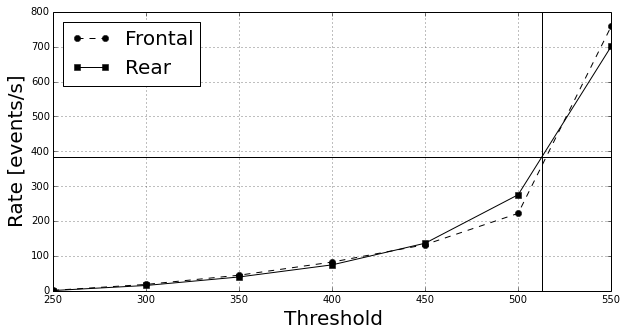

In [16]:
#x_err_c = np.array(Vth0)
#y_err_c = np.asarray(mean)

#xerr = x_err_c - x_err_c
#yerr = np.asarray(std)

fig = plt.figure(figsize=(10, 5))
plt.plot(Vth0_P1, mean_P1, '--k', marker= "o")
plt.plot(Vth0_P2, mean_P2, '-+k', marker= "s")
plt.xlabel("Threshold", fontsize = 20)
plt.ylabel("Rate [events/s]", fontsize = 20)
plt.axhline(y=384, xmin=0, xmax=1, color='black', zorder=1)
plt.axvline(x=513, ymin=0, ymax=1, color='black', zorder=1)
plt.legend(["Frontal", "Rear"], loc=2, fontsize = 20)
#plt.errorbar(x_err_c, y_err_c, yerr, xerr, fmt='or', linewidth=2.0)
plt.grid()
plt.show()

### Rate after RPi 2 update

In [12]:
P1 = np.loadtxt('Rate_P1_G10_Th500.dat')
Dual = np.loadtxt('Rate_Dual_G10_Th500.dat')

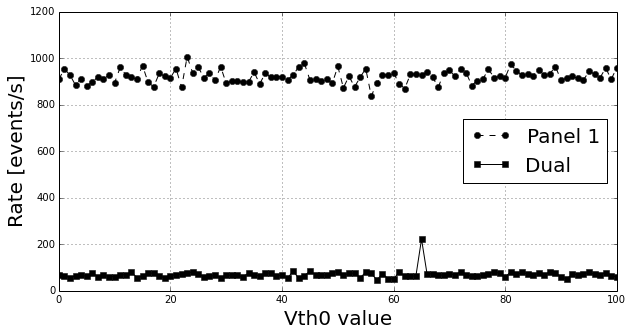

In [13]:
fig = plt.figure(figsize=(10, 5))
plt.plot(P1, '--k', marker= "o")
plt.plot(Dual, '-+k', marker= "s")
plt.xlabel("Vth0 value", fontsize = 20)
plt.ylabel("Rate [events/s]", fontsize = 20)
plt.legend(["Panel 1", "Dual"], loc=5, fontsize = 20)
plt.grid()
plt.show()

In [14]:
print 'Single panel rate = ' + str(np.mean(P1))
print 'Coincidence rate = ' + str(np.mean(Dual))

Single panel rate = 922.059405940594
Coincidence rate = 70.03960396039604


# Metada analysis

### Metadata description

Each second:

\# s < UTC \> : Unix time stamp

\# r < R \> : Event rate

Each minute:

\# m < Lat \> N < Lon \> W < Alt \> m Detector positioning

\# p < T \> C < P \> hPa: Panel temperature and atmospheric pressure 

Data extraction:

cat Pulses_Final.dat | awk '{if($1 =="#")if($2 == "s"){print $3}}'

In [46]:
DAC = [500.0,600.0]
pe = [9,2]

m,b = np.polyfit(DAC,pe,1)

In [47]:
DAC_x = np.linspace(0,1023,1024)
pe_y = m*DAC_x + b

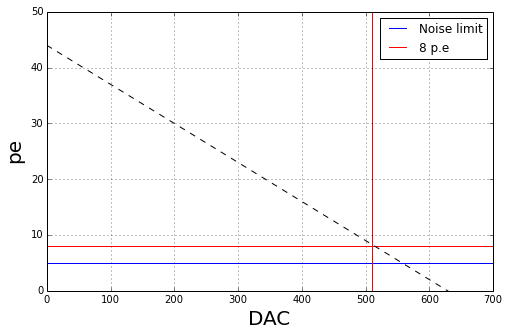

In [61]:
fig = plt.figure(figsize=(8, 5))
plt.axhline(y=5)
plt.axvline(x=510,color='r')
plt.axhline(y=8,color='r')
plt.plot(DAC_x, pe_y,'--k')
plt.xlabel("DAC", fontsize = 20)
plt.ylabel("pe", fontsize = 20)
plt.legend(["Noise limit","8 p.e"])
plt.ylim([0,50])
plt.xlim([0,700])
plt.grid()
plt.show()